In [33]:
import pandas as pd

df = pd.read_csv("data/turnstile_180922.txt") # read the MTA data from csv file

In [158]:
df.head(5) # view of the first 5 rows of MTA data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574


In [19]:
df.tail(5) # view of the last 5 rows of the MTA data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348


#### Capture the top ten stations with the most rows of data
* Question: do more rows of data represent greater activity?
  - **no; a station could have more turnstiles, which represents more rows of data for that station**

In [187]:
df['STATION'].value_counts().head(10)

34 ST-PENN STA     4245
FULTON ST          4054
CORTLANDT ST       3159
GRD CNTRL-42 ST    2762
23 ST              2571
CANAL ST           2436
CHAMBERS ST        2299
34 ST-HERALD SQ    2279
59 ST              2260
42 ST-PORT AUTH    2162
Name: STATION, dtype: int64

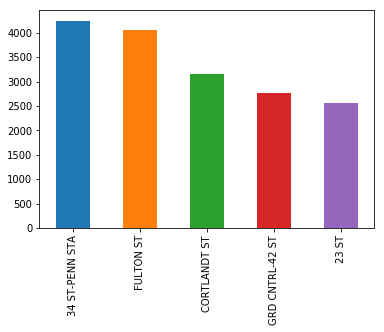

In [64]:
df['STATION'].value_counts().head(5).plot('bar')

#### Looking up unique dates from the 9/22/18 MTA data file, audit reports are only for the month of September
* Did we want to look at MTA turnstile data for other months? **YES**
* Could we simply minus the 'min' from the 'max' to get each device's entries for the week?

In [7]:
df['DATE'].unique() # data is from Sunday to Saturday

array(['09/15/2018', '09/16/2018', '09/17/2018', '09/18/2018',
       '09/19/2018', '09/20/2018', '09/21/2018'], dtype=object)

#### Using Pandas to analyze STATION = '59 ST'

In [160]:
df[df.STATION == '59 ST'].head(10) # top ten rows of data associated with station '59 ST'

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,20:00:00,REGULAR,6759808,2291608
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,00:00:00,REGULAR,6759951,2291626
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,04:00:00,REGULAR,6759968,2291630
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,08:00:00,REGULAR,6759987,2291639
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,12:00:00,REGULAR,6760045,2291661


#### Unique C/A values associated with 59 ST

In [188]:
df[df.STATION == '59 ST']['C/A'].unique()

array(['A002', 'C021', 'C022', 'R244', 'R244A', 'R245', 'R245A'],
      dtype=object)

#### Unique UNIT values associated with 59 ST

In [189]:
df[df.STATION == '59 ST']['UNIT'].unique()

array(['R051', 'R212', 'R050'], dtype=object)

#### Unique SCP values associated with 59 ST

In [190]:
df[df.STATION == '59 ST']['SCP'].unique()

array(['02-00-00', '02-00-01', '02-03-00', '02-03-01', '02-03-02',
       '02-03-03', '02-03-04', '02-03-05', '02-03-06', '02-05-00',
       '02-05-01', '02-06-00', '00-00-00', '00-00-01', '00-00-02',
       '00-00-03', '01-03-00', '01-05-00', '01-05-01', '01-06-00',
       '01-06-01', '00-00-04', '00-03-00', '00-03-01', '00-03-02',
       '00-06-00', '00-06-01', '00-06-02', '01-00-00', '01-00-01',
       '01-00-02', '01-00-03', '01-00-04', '00-03-03', '00-05-00',
       '00-05-01', '00-05-02'], dtype=object)

#### It appears that for instances where column 'TIME' deviates from the four-hour audit interval, there seems to be no negative effect to the overall data with regards to entry differences between normal / regular intervals

* Question: are we able to disregard times outside of the normal 4-hour audit report intervals?

#### Most frequent audit times

In [191]:
df[df.STATION == '59 ST']['TIME'].value_counts()

04:00:00    371
20:00:00    371
00:00:00    371
16:00:00    371
08:00:00    371
12:00:00    371
07:26:01     12
14:25:57      6
13:23:12      6
13:22:02      5
14:23:56      5
Name: TIME, dtype: int64

#### Looking up rows / indices where TIME is '07:26:01'

In [192]:
df.loc[(df.STATION == '59 ST') & (df.TIME == '07:26:01'),]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
32,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,6764512,2293206
75,A002,R051,02-00-01,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,6049284,1354899
118,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,1128159,4217864
161,A002,R051,02-03-01,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,832503,1289784
204,A002,R051,02-03-02,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,5916484,8026824
247,A002,R051,02-03-03,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,5497363,6375182
290,A002,R051,02-03-04,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,6848797,3584714
333,A002,R051,02-03-05,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,11008883,1370163
376,A002,R051,02-03-06,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,8652918,492925
419,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,54,0


In [178]:
df.iloc[28:38] # seeing rows adjacent to row index = 32 (where TIME = 07:26:01); ENTRIES not negatively affected

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2018,16:00:00,REGULAR,6763565,2293076
29,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2018,20:00:00,REGULAR,6764299,2293118
30,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,00:00:00,REGULAR,6764482,2293147
31,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,04:00:00,REGULAR,6764494,2293148
32,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,6764512,2293206
33,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,08:00:00,REGULAR,6764529,2293257
34,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,12:00:00,REGULAR,6764691,2293501
35,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,16:00:00,REGULAR,6764991,2293576
36,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/20/2018,20:00:00,REGULAR,6765784,2293634
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/21/2018,00:00:00,REGULAR,6765976,2293661


In [179]:
df.iloc[115:124] # seeing rows adjacent to row index = 118 (where TIME = 07:26:01); ENTRIES are not negatively affected

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
115,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/19/2018,20:00:00,REGULAR,1128073,4217578
116,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,00:00:00,REGULAR,1128147,4217706
117,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,04:00:00,REGULAR,1128149,4217712
118,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,07:26:01,REGULAR,1128159,4217864
119,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,08:00:00,REGULAR,1128160,4217994
120,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,12:00:00,REGULAR,1128208,4218780
121,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,16:00:00,REGULAR,1128313,4219128
122,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/20/2018,20:00:00,REGULAR,1128568,4219710
123,A002,R051,02-03-00,59 ST,NQR456W,BMT,09/21/2018,00:00:00,REGULAR,1128660,4219864


#### Looking up rows / indices where TIME = '14:25:57'

In [193]:
df.loc[(df.STATION == '59 ST') & (df.TIME == '14:25:57'),]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
156661,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,11919847,4186908
156705,R245A,R051,01-00-01,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,12110750,6156329
156749,R245A,R051,01-00-02,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,6432222,9949139
156793,R245A,R051,01-00-03,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,2630056,5212030
156837,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,3229268,4418676
156881,R245A,R051,01-06-01,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,117451281,192112


In [180]:
df.iloc[156655:156665] # rows adjacent to TIME = 14:25:57 are not negatively affected with regards to ENTRIES

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
156655,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/17/2018,20:00:00,REGULAR,11918182,4185862
156656,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,00:00:00,REGULAR,11918711,4185924
156657,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,04:00:00,REGULAR,11918831,4185932
156658,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,08:00:00,REGULAR,11918959,4186146
156659,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,12:00:00,REGULAR,11919418,4186778
156660,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,13:23:12,REGULAR,11919642,4186850
156661,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,11919847,4186908
156662,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,16:00:00,REGULAR,11920336,4186991
156663,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/18/2018,20:00:00,REGULAR,11921922,4187226
156664,R245A,R051,01-00-00,59 ST,456NQRW,IRT,09/19/2018,00:00:00,REGULAR,11922460,4187296


In [181]:
df.iloc[156831:156841] # rows adjacent to TIME = 14:25:57 are not negatively affected with regards to ENTRIES

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
156831,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/17/2018,20:00:00,REGULAR,3229155,4417896
156832,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,00:00:00,REGULAR,3229186,4417943
156833,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,04:00:00,REGULAR,3229194,4417949
156834,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,08:00:00,REGULAR,3229206,4418075
156835,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,12:00:00,REGULAR,3229234,4418549
156836,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,13:23:12,REGULAR,3229248,4418608
156837,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,14:25:57,REGULAR,3229268,4418676
156838,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,16:00:00,REGULAR,3229340,4418777
156839,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/18/2018,20:00:00,REGULAR,3229621,4419027
156840,R245A,R051,01-06-00,59 ST,456NQRW,IRT,09/19/2018,00:00:00,REGULAR,3229655,4419086


#### We also want to review rows where ENTRIES = 0 or are lower than expected values

Below, we see a couple instances where ENTRIES = 0

In [194]:
df[df.STATION == '59 ST'].groupby(['UNIT','C/A','SCP'])[['ENTRIES']].max()

ENTRIES
UNIT C/A   SCP                 
R050 R244  00-00-00      175731
           00-00-01     8870450
           00-00-02     2988206
           00-00-03      115614
           00-00-04      555293
           00-03-00     1758194
           00-03-01     1264382
           00-03-02     2851907
           00-06-00     2066375
           00-06-01     3838744
           00-06-02     5544147
     R244A 01-00-00     4461983
           01-00-01     6311030
           01-00-02    17673046
           01-00-03     7742114
           01-00-04     4677426
           01-06-00     7947398
           01-06-01     4671185
R051 A002  02-00-00     6767315
           02-00-01     6051527
           02-03-00     1129094
           02-03-01      834870
           02-03-02     5918877
           02-03-03     5499505
           02-03-04     6851331
           02-03-05    11012652
           02-03-06     8656009
           02-05-00          55
           02-05-01           0
           02-06-00     7634538
     R245  00-00-00   703694898
           00-03-00    10952675
           00-03-01     6010156
           00-03-02  1040702436
           00-03-03     6182513
           00-05-00      426052
           00-05-01    12780280
           00-05-02     7262689
     R245A 01-00-00    11933167
           01-00-01    12122903
           01-00-02     6440203
           01-00-03     2635769
           01-06-00     3231020
           01-06-01   117451683
R212 C021  00-00-00     8459103
           00-00-01     7836010
           00-00-02  2030098619
           00-00-03    13498737
     C022  01-03-00     1482433
           01-05-00      262636
           01-05-01           0
           01-06-00     5779275
           01-06-01    10778303

In [197]:
df[(df.STATION == '59 ST') & (df.SCP == '01-05-01')]

#df.iloc[420:480]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
23275,C022,R212,01-05-01,59 ST,NRW,BMT,09/15/2018,00:00:00,REGULAR,0,409
23276,C022,R212,01-05-01,59 ST,NRW,BMT,09/15/2018,04:00:00,REGULAR,0,409
23277,C022,R212,01-05-01,59 ST,NRW,BMT,09/15/2018,08:00:00,REGULAR,0,409
23278,C022,R212,01-05-01,59 ST,NRW,BMT,09/15/2018,12:00:00,REGULAR,0,409
23279,C022,R212,01-05-01,59 ST,NRW,BMT,09/15/2018,16:00:00,REGULAR,0,410
23280,C022,R212,01-05-01,59 ST,NRW,BMT,09/15/2018,20:00:00,REGULAR,0,410
23281,C022,R212,01-05-01,59 ST,NRW,BMT,09/16/2018,00:00:00,REGULAR,0,410
23282,C022,R212,01-05-01,59 ST,NRW,BMT,09/16/2018,04:00:00,REGULAR,0,410
23283,C022,R212,01-05-01,59 ST,NRW,BMT,09/16/2018,08:00:00,REGULAR,0,410
23284,C022,R212,01-05-01,59 ST,NRW,BMT,09/16/2018,12:00:00,REGULAR,0,410


In [131]:
df[(df.SCP == '02-05-00') & (df.STATION == '59 ST')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
387,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,53,0
388,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,53,0
389,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,53,0
390,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,53,0
391,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,53,0
392,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/15/2018,20:00:00,REGULAR,53,0
393,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/16/2018,00:00:00,REGULAR,53,0
394,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/16/2018,04:00:00,REGULAR,53,0
395,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/16/2018,08:00:00,REGULAR,53,0
396,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/16/2018,12:00:00,REGULAR,53,0


#### There are no nulls for the column TIME

In [182]:
df[df.TIME.isnull()] # there are no nulls for column TIME

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


#### Looking at the column ENTRIES

In [88]:
df[df.STATION == '59 ST']['ENTRIES'].head(10)

0    6759219
1    6759234
2    6759251
3    6759330
4    6759538
5    6759808
6    6759951
7    6759968
8    6759987
9    6760045
Name: ENTRIES, dtype: int64

In [61]:
df[df.STATION == '59 ST']['ENTRIES'].diff().head(10) # this takes the difference of every row

0      NaN
1     15.0
2     17.0
3     79.0
4    208.0
5    270.0
6    143.0
7     17.0
8     19.0
9     58.0
Name: ENTRIES, dtype: float64

In [ ]:
temp_df = df[df.STATION == '59 ST'].groupby(['STATION','UNIT','C/A','SCP'])['ENTRIES'].agg(['min','max'])
temp_df.head(10)

In [29]:
# use below to check the data for a specific turnstile; see max and min entries

#df[(df.STATION == '59 ST') & (df.UNIT == 'R050') & (df['C/A'] == 'R244') & (df.SCP == '00-00-00')]

#### For each device (station / unit / 'c/a' / scp) we gather the entries delta (max-min) for the week

#### Summing the entries, for all turnstiles, should give us the total activity at a station

In [35]:
temp_df_2 = (temp_df['max']-temp_df['min']) # create column that calculates the entry difference (max-min) per turnstile

In [36]:
temp_df_2 # here we see the entries delta per each turnstile for station '59 ST'

STATION  UNIT  C/A    SCP     
59 ST    R050  R244   00-00-00     6739
                      00-00-01     5357
                      00-00-02     2061
                      00-00-03      691
                      00-00-04      258
                      00-03-00     3271
                      00-03-01     5224
                      00-03-02     6195
                      00-06-00     6237
                      00-06-01    12606
                      00-06-02    18999
               R244A  01-00-00     6209
                      01-00-01    14321
                      01-00-02    14701
                      01-00-03    12979
                      01-00-04    19411
                      01-06-00     6742
                      01-06-01     2641
         R051  A002   02-00-00     8096
                      02-00-01     6296
                      02-03-00     2884
                      02-03-01     7654
                      02-03-02     7585
                      02-03-03     6721
         

In [37]:
# calculate the sum of all turnstile entries deltas for a given station

sum_of_entries = 0
for x in temp_df_2: 
    sum_of_entries += x
sum_of_entries

398995

## Functions for calculating total entries per station

In [40]:
# Function to calculate total weekly entries for all stations

def totalStationEntries(df):
    '''
    Input: DataFrame of MTA turnstile data
    Output: list of lists, where each inner list represents ['STATION','TOTAL ENTRIES']
    '''
    # empty list
    total_entries_list = []
    
    # capture list of all stations
    list_of_stations = df.STATION.unique()
    
    # iterate through each station and capture total entries per station
    for x in list_of_stations:
        station_entries = totalEntriesPerStation(df,x)
        total_entries_list.append(station_entries)
    
    return total_entries_list
    

# function for capturing total entries for a given station
def totalEntriesPerStation(df,station):
    '''
    Input: DataFrame of MTA turnstile dataset; station of interest
    Output: total entries for that station
    '''
    
    # first aggregate the max and min for each turnstile within a train station
    temp_df = df[df.STATION == station].groupby(['STATION','UNIT','C/A','SCP'])['ENTRIES'].agg(['min','max'])
    
    # create column that calculates the entry difference (max-min) per turnstile
    temp_df_2 = (temp_df['max']-temp_df['min']) 
    
    # aggregate the turnstile entry differences to get total entries for station
    sum_of_entries = 0
    for x in temp_df_2: 
        sum_of_entries += x
        
    return [station,sum_of_entries]

In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/turnstile_180922.txt") # read the MTA data from csv file

In [43]:
hist = totalStationEntries(df) # calculate the total entries for all stations and captures in a list
hist_updated = pd.DataFrame(hist,columns=['STATION','TOTAL ENTRIES']) # create a DataFrame based on list above
hist_updated = hist_updated.sort_values(by='TOTAL ENTRIES',ascending=False) # sort DataFrame by column 'TOTAL ENTRIES'
hist_updated.head(20) # show the top 20 stations with the most number of total entries

,STATION,TOTAL ENTRIES
281,149/GRAND CONC,32753164
28,CORTELYOU RD,15858210
292,JACKSON AV,3330445
342,82 ST-JACKSON H,3238230
61,50 ST,3117401
241,CITY / BUS,2947869
203,NASSAU AV,1684960
237,JOURNAL SQUARE,1291403
133,34 ST-PENN STA,1006155
276,GRD CNTRL-42 ST,888668


In [17]:
hist_updated[hist_updated.STATION=='59 ST']

,STATION,TOTAL ENTRIES
0,59 ST,398995


In [46]:
import seaborn as sns
sns.set()
# Supress warnings
import warnings

warnings.simplefilter("ignore")

from __future__ import print_function, division

import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [47]:
# capture both the entries values and associated stations in lists (for plotting later)

values = []
stations = []

for x in range(10):
    values.append(hist_updated['TOTAL ENTRIES'].iloc[x])
    stations.append(hist_updated['STATION'].iloc[x])

In [48]:
hist_updated['STATION'].head(10)

281     149/GRAND CONC
28        CORTELYOU RD
292         JACKSON AV
342    82 ST-JACKSON H
61               50 ST
241         CITY / BUS
203          NASSAU AV
237     JOURNAL SQUARE
133     34 ST-PENN STA
276    GRD CNTRL-42 ST
Name: STATION, dtype: object

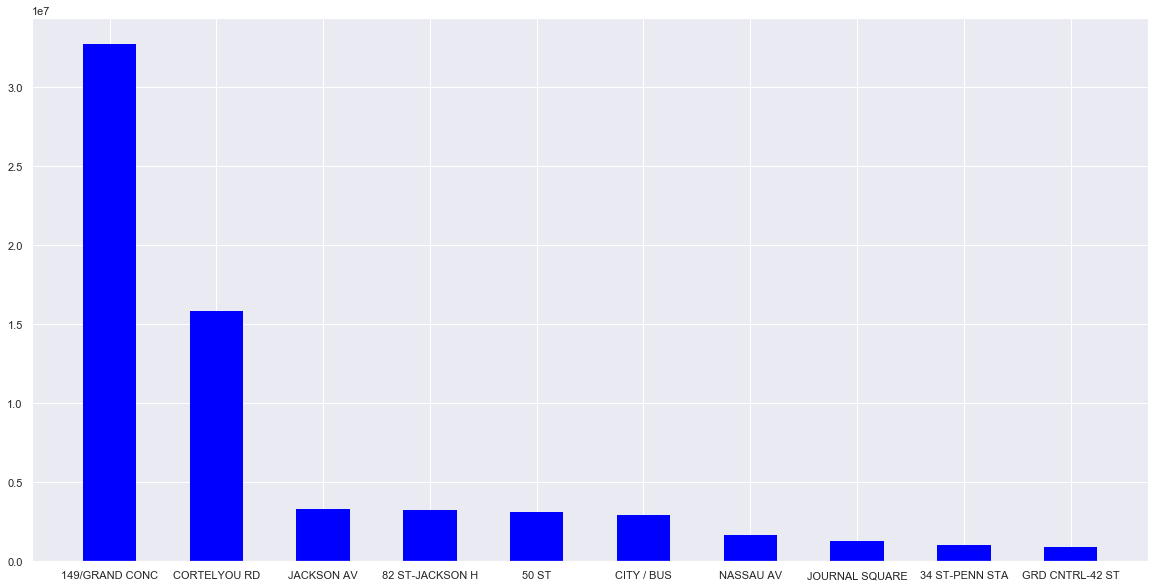

In [49]:
plt.figure(figsize=(20,10))
plt.bar(stations,
        values,
        color='blue',
        edgecolor='none',
        width=0.5,
        align='center',
        label='y1')
#plt.legend() # to show the label = 'y1' on the bar plot
plt.xticks(stations, [str(station) for station in stations]);

#### Per the above, it looks like a couple stations may have erroneous data

In [122]:
# looking into station '149/GRAND CONC' to see what's causing the huge entries value

temp_df = df[df.STATION == '149/GRAND CONC'].groupby(['STATION','UNIT','C/A','SCP'])['ENTRIES'].agg(['min','max'])
temp_df.head(10)

min        max
STATION        UNIT C/A  SCP                           
149/GRAND CONC R205 R260 01-05-00  117443313  117443321
                         01-06-00   17666532   17685163
                         01-06-01     468379     473897
                    R261 00-00-01     258566     275938
                         00-00-02     111756     138851

### Per the turnstile breakdown, it looks like there are two devices causing the huge entries value: SCP = '00-00-00' and '01-05-01'

#### Even though there appears to be some activity for SCP = '00-00-00' (outside the reset / break), the amount of activity is much less relative to other train stations with valid data

In [70]:
df[(df.STATION == '149/GRAND CONC') & (df.SCP == '00-00-00')] # device resets / breaks on 09/19/18

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
161013,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/15/2018,00:00:00,REGULAR,153733,264677
161014,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/15/2018,04:00:00,REGULAR,153762,264781
161015,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/15/2018,08:00:00,REGULAR,153842,264931
161016,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/15/2018,12:00:00,REGULAR,154038,265346
161017,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/15/2018,16:00:00,REGULAR,154275,265903
161018,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/15/2018,20:00:00,REGULAR,154487,266403
161019,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/16/2018,00:00:00,REGULAR,154568,266647
161020,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/16/2018,04:00:00,REGULAR,154587,266765
161021,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/16/2018,08:00:00,REGULAR,154628,266830
161022,R261,R205,00-00-00,149/GRAND CONC,245,IRT,09/16/2018,12:00:00,REGULAR,154739,267054


#### For SCP = '01-05-01', given the low level of activity in columns ENTRIES and EXITS (outside of the change due to reset / break), it may be worthwhile to remove this specific device from the overall data set

In [54]:
df[(df.STATION == '149/GRAND CONC') & (df.SCP == '01-05-01')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
160890,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/15/2018,00:00:00,REGULAR,0,38232
160891,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/15/2018,04:00:00,REGULAR,0,38232
160892,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/15/2018,12:00:00,REGULAR,458752,1
160893,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/15/2018,16:00:00,REGULAR,458752,1
160894,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/15/2018,20:00:00,REGULAR,458752,1
160895,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/16/2018,00:00:00,REGULAR,458752,1
160896,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/16/2018,04:00:00,REGULAR,458752,1
160897,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/16/2018,08:00:00,REGULAR,458752,1
160898,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/16/2018,12:00:00,REGULAR,458752,1
160899,R260,R205,01-05-01,149/GRAND CONC,245,IRT,09/16/2018,16:00:00,REGULAR,458752,1


#### We need to clean the data - specifically remove the erroneous data in station = '149/GRAND CONC'

In [77]:
# Remove the rows that have erroneous entries data

df.loc[(df.STATION == '149/GRAND CONC') & (df.SCP == '00-00-00')] = 0 # remove rows where SCP = '00-00-00'
df.loc[(df.STATION == '149/GRAND CONC') & (df.SCP == '01-05-01')] = 0 # remove rows where SCP = '01-05-01'

### We also need to look at the other train station that is drastically different from the other train stations: 'CORTELYOU RD'

In [79]:
# looking into station 'CORTELYOU RD' to see what's causing the huge entries value

temp_df = df[df.STATION == 'CORTELYOU RD'].groupby(['STATION','UNIT','C/A','SCP'])['ENTRIES'].agg(['min','max'])
temp_df.head(10)

min       max
STATION      UNIT C/A  SCP                        
CORTELYOU RD R184 B018 00-00-00       52  15832680
                       00-00-01  2379885   2392692
                       00-00-02  5679430   5692205

#### Per above, we see that for this station, SCP = '00-00-00' has an extremely large change in entries data

In [81]:
df[(df.STATION == 'CORTELYOU RD') & (df.SCP == '00-00-00')] # we see that on 09/15/18, the ENTRIES counter resets

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
14947,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,00:00:00,REGULAR,15832652,7629052
14948,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,04:00:00,REGULAR,15832680,7629078
14949,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,08:00:00,REGULAR,52,17
14950,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,12:00:00,REGULAR,545,139
14951,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,16:00:00,REGULAR,1016,300
14952,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,20:00:00,REGULAR,1372,493
14953,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,00:00:00,REGULAR,1525,621
14954,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,04:00:00,REGULAR,1562,657
14955,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,08:00:00,REGULAR,1701,686
14956,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,12:00:00,REGULAR,2134,787


#### For the sack of saving the data, it may be worthwhile to simply remove the first two rows of data associated with this device and save the rest

In [93]:
df.loc[(df.STATION == 'CORTELYOU RD') & (df.SCP == '00-00-00') & (df.TIME == '00:00:00')] = 0
df.loc[(df.STATION == 'CORTELYOU RD') & (df.SCP == '00-00-00') & (df.TIME == '04:00:00')] = 0

#### Two rows have been removed from DataFrame (per below)

In [95]:
df.loc[(df.STATION == 'CORTELYOU RD') & (df.SCP == '00-00-00')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
14949,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,08:00:00,REGULAR,52,17
14950,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,12:00:00,REGULAR,545,139
14951,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,16:00:00,REGULAR,1016,300
14952,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/15/2018,20:00:00,REGULAR,1372,493
14955,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,08:00:00,REGULAR,1701,686
14956,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,12:00:00,REGULAR,2134,787
14957,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,16:00:00,REGULAR,2576,959
14958,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/16/2018,20:00:00,REGULAR,2813,1186
14961,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/17/2018,08:00:00,REGULAR,3713,1382
14962,B018,R184,00-00-00,CORTELYOU RD,BQ,BMT,09/17/2018,12:00:00,REGULAR,4543,1676


### Now we can re-run previous functions on the updated data and plot bar graph

In [96]:
hist = totalStationEntries(df) # calculate the total entries for all stations and captures in a list
hist_updated = pd.DataFrame(hist,columns=['STATION','TOTAL ENTRIES']) # create a DataFrame based on list above
hist_updated = hist_updated.sort_values(by='TOTAL ENTRIES',ascending=False) # sort DataFrame by column 'TOTAL ENTRIES'
hist_updated.head(20) # show the top 20 stations with the most number of total entries

,STATION,TOTAL ENTRIES
293,JACKSON AV,3330445
343,82 ST-JACKSON H,3238230
62,50 ST,3117401
242,CITY / BUS,2947869
204,NASSAU AV,1684960
238,JOURNAL SQUARE,1291403
134,34 ST-PENN STA,1006155
277,GRD CNTRL-42 ST,888668
5,34 ST-HERALD SQ,735467
105,75 ST-ELDERTS,678392


In [97]:
values = []
stations = []

for x in range(10):
    values.append(hist_updated['TOTAL ENTRIES'].iloc[x])
    stations.append(hist_updated['STATION'].iloc[x])

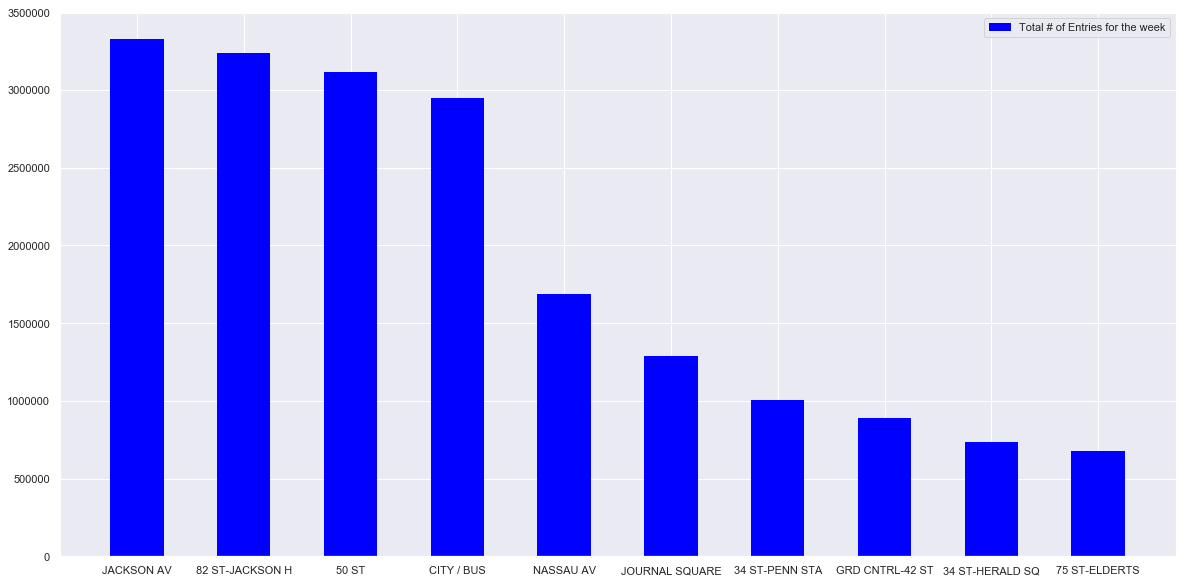

In [99]:
plt.figure(figsize=(20,10))
plt.bar(stations,
        values,
        color='blue',
        edgecolor='none',
        width=0.5,
        align='center',
        label='Total # of Entries for the week')
plt.legend() # to show the label = 'y1' on the bar plot
plt.xticks(stations, [str(station) for station in stations]);

In [117]:
temp_df = df[df.STATION == '82 ST-JACKSON H'].groupby(['STATION','UNIT','C/A','SCP'])['ENTRIES'].agg(['min','max'])
temp_df

min      max
STATION         UNIT C/A  SCP                       
82 ST-JACKSON H R096 R526 00-00-00    22630    28447
                          00-00-01       83  3159733
                          00-03-00  5620314  5629500
                          00-03-01  5556480  5562810
                          00-03-02  1581775  1588347
                          00-03-03  4043939  4056274
                          00-05-00  5495204  5506401
                          00-05-01  6516833  6530194
                          00-05-02   642989   648955
                          00-05-03   824517   832333

In [110]:
df[(df.STATION == 'JACKSON AV') & (df.SCP == '00-00-00')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
166474,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,01:00:00,REGULAR,3306495,329640
166475,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,05:00:00,REGULAR,3306516,329646
166476,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,09:00:00,REGULAR,3306751,329658
166477,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,13:00:00,REGULAR,3306998,329686
166478,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,17:00:00,REGULAR,3307228,329712
166479,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,21:00:00,REGULAR,3307404,329749
166480,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,01:00:00,REGULAR,3307483,329801
166481,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,05:00:00,REGULAR,3307505,329812
166482,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,09:00:00,REGULAR,3307626,329822
166483,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,13:00:00,REGULAR,3307787,329832


In [119]:
df['DIFF_ENTRY'] = df['ENTRIES'].diff()
df[(df.STATION == 'JACKSON AV') & (df.SCP == '00-00-00')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DIFF_ENTRY
166474,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,01:00:00,REGULAR,3306495,329640,3306495.0
166475,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,05:00:00,REGULAR,3306516,329646,21.0
166476,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,09:00:00,REGULAR,3306751,329658,235.0
166477,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,13:00:00,REGULAR,3306998,329686,247.0
166478,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,17:00:00,REGULAR,3307228,329712,230.0
166479,R312,R405,00-00-00,JACKSON AV,25,IRT,09/15/2018,21:00:00,REGULAR,3307404,329749,176.0
166480,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,01:00:00,REGULAR,3307483,329801,79.0
166481,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,05:00:00,REGULAR,3307505,329812,22.0
166482,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,09:00:00,REGULAR,3307626,329822,121.0
166483,R312,R405,00-00-00,JACKSON AV,25,IRT,09/16/2018,13:00:00,REGULAR,3307787,329832,161.0
